In [62]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing, model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import xml.etree.cElementTree as ET
import gensim
from gensim.test.utils import common_texts
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,  classification_report,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve
from nltk.corpus import stopwords
from nltk import pos_tag
import string
from gensim.models.word2vec import Word2Vec
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import gensim.downloader as api
import spacy

In [63]:
path = '../Dataset/data/restaurants_laptop_train_with_pos_task1_cleaned.csv'
df = pd.read_csv(path)
#punc = []
#for p in string.punctuation:
#    punc.append(p)
#df["text"] = df.apply(lambda r: r["text"].lower(), axis = 1)
#df = df[~df.text.isin(punc)]
df

,num,text,pos,aspect_tag,polarity
0,s_1,I,PRON,NAT,0
1,s_1,charge,VERB,NAT,0
2,s_1,it,PRON,NAT,0
3,s_1,at,ADP,NAT,0
4,s_1,night,NOUN,NAT,0
...,...,...,...,...,...
56575,s_3501,and,CCONJ,NAT,0
56576,s_3501,rice,NOUN,AT,0
56577,s_3501,and,CCONJ,NAT,0
56578,s_3501,glass,NOUN,AT,0


In [64]:
dataset = api.load("text8")  # load dataset as iterable
model = Word2Vec(dataset)
#model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [65]:
encoder = preprocessing.LabelEncoder()
df.loc[:, "aspect_tag"] = encoder.fit_transform(df["aspect_tag"])
df.loc[:, "pos"] = encoder.fit_transform(df["pos"])

df

,num,text,pos,aspect_tag,polarity
0,s_1,I,10,1,0
1,s_1,charge,15,1,0
2,s_1,it,10,1,0
3,s_1,at,1,1,0
4,s_1,night,7,1,0
...,...,...,...,...,...
56575,s_3501,and,4,1,0
56576,s_3501,rice,7,0,0
56577,s_3501,and,4,1,0
56578,s_3501,glass,7,0,0


In [66]:
deleted_row = []
count = 0
text_df = pd.DataFrame()
for word in df["text"].values:
    temp = pd.DataFrame()
    try:
        word_vec = model.wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
        temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
    except:
        deleted_row.append(count)
    count+=1
    text_df = text_df.append(temp, ignore_index = True)
text_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.180429,0.143549,0.969602,1.719024,-1.698974,-3.705615,0.254765,-0.581441,1.726296,0.644686,...,-0.041535,0.606832,-1.053411,-1.999202,0.107512,-1.653523,0.727719,-0.817722,0.686159,0.261695
1,-0.060769,-4.065909,0.654337,-1.041377,-1.994170,-0.804813,0.332601,0.424419,1.505415,2.445548,...,-2.478959,-0.913809,1.266067,-1.084492,2.076846,-0.378968,-1.652113,1.477451,-0.837377,1.831417
2,-2.089250,-3.245356,0.252755,3.510931,-1.142313,0.033402,-1.944351,0.089593,2.317211,-1.841362,...,-3.417908,-0.132668,-1.115134,-4.485195,-1.227237,1.482075,-0.555454,1.101495,0.765291,2.096274
3,1.459651,-1.852242,-0.560233,1.002404,-0.747749,0.472651,-0.571518,-0.846084,-1.289168,-0.662280,...,-1.276078,-1.960155,0.122261,1.058653,2.472912,-2.042961,-0.947366,-0.677044,-1.625448,1.673823
4,-0.083180,1.381547,-1.256899,-0.467783,-0.538044,0.354756,-0.418119,1.037508,-0.200114,0.242065,...,-0.444781,1.353701,0.236815,-0.177834,-0.314867,0.993647,-0.914822,-1.080295,0.456450,-0.949892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48353,-0.083180,1.381547,-1.256899,-0.467783,-0.538044,0.354756,-0.418119,1.037508,-0.200114,0.242065,...,-0.444781,1.353701,0.236815,-0.177834,-0.314867,0.993647,-0.914822,-1.080295,0.456450,-0.949892
48354,0.373396,1.241380,-0.748581,0.036530,-0.555143,0.789945,-1.958630,0.812150,-1.387703,-0.932054,...,1.010124,0.000853,2.096291,1.329877,2.210470,-0.822658,-2.043975,-0.133552,-1.480306,0.490008
48355,-0.083180,1.381547,-1.256899,-0.467783,-0.538044,0.354756,-0.418119,1.037508,-0.200114,0.242065,...,-0.444781,1.353701,0.236815,-0.177834,-0.314867,0.993647,-0.914822,-1.080295,0.456450,-0.949892
48356,0.910802,-0.975498,-0.599359,-1.108680,-1.881795,0.272822,-2.474079,-0.093896,-1.437781,-1.705517,...,-0.933579,-1.484037,1.380602,-1.429162,2.652227,-0.844095,-0.259572,-0.510930,-0.361429,0.252202


In [67]:
df = df.drop(df.index[deleted_row])

In [68]:
df = df.reset_index()

In [69]:
text_df["pos"] = df["pos"]
text_df["aspect_tag"] = df["aspect_tag"]
text_df["polarity"] = df["polarity"]


In [70]:
text_df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,pos,aspect_tag,polarity
0,-0.180429,0.143549,0.969602,1.719024,-1.698974,-3.705615,0.254765,-0.581441,1.726296,0.644686,...,-1.999202,0.107512,-1.653523,0.727719,-0.817722,0.686159,0.261695,15,1,0
1,-0.060769,-4.065909,0.654337,-1.041377,-1.994170,-0.804813,0.332601,0.424419,1.505415,2.445548,...,-1.084492,2.076846,-0.378968,-1.652113,1.477451,-0.837377,1.831417,10,1,0
2,-2.089250,-3.245356,0.252755,3.510931,-1.142313,0.033402,-1.944351,0.089593,2.317211,-1.841362,...,-4.485195,-1.227237,1.482075,-0.555454,1.101495,0.765291,2.096274,1,1,0
3,1.459651,-1.852242,-0.560233,1.002404,-0.747749,0.472651,-0.571518,-0.846084,-1.289168,-0.662280,...,1.058653,2.472912,-2.042961,-0.947366,-0.677044,-1.625448,1.673823,7,1,0
4,-0.083180,1.381547,-1.256899,-0.467783,-0.538044,0.354756,-0.418119,1.037508,-0.200114,0.242065,...,-0.177834,-0.314867,0.993647,-0.914822,-1.080295,0.456450,-0.949892,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48353,-0.083180,1.381547,-1.256899,-0.467783,-0.538044,0.354756,-0.418119,1.037508,-0.200114,0.242065,...,-0.177834,-0.314867,0.993647,-0.914822,-1.080295,0.456450,-0.949892,4,1,0
48354,0.373396,1.241380,-0.748581,0.036530,-0.555143,0.789945,-1.958630,0.812150,-1.387703,-0.932054,...,1.329877,2.210470,-0.822658,-2.043975,-0.133552,-1.480306,0.490008,7,0,0
48355,-0.083180,1.381547,-1.256899,-0.467783,-0.538044,0.354756,-0.418119,1.037508,-0.200114,0.242065,...,-0.177834,-0.314867,0.993647,-0.914822,-1.080295,0.456450,-0.949892,4,1,0
48356,0.910802,-0.975498,-0.599359,-1.108680,-1.881795,0.272822,-2.474079,-0.093896,-1.437781,-1.705517,...,-1.429162,2.652227,-0.844095,-0.259572,-0.510930,-0.361429,0.252202,7,0,0


In [71]:
#Uncomment here to load the pretrained model
dataset = api.load("text8")  # load dataset as iterable
model = Word2Vec(dataset)
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [72]:
def evaluate_model(model, test, label_test):
    predicted = model.predict(test)
    print("accuracy:", str(accuracy_score(label_test, predicted)))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    
    plot_confusion_matrix(model, test, label_test,
                      display_labels=list(np.unique(label_test)),
                      cmap=plt.cm.Blues)
    
    classification = classification_report(label_test, predicted)
    print(classification)


In [73]:
train, test = train_test_split(text_df, test_size = 0.2, random_state=42)
X_train = train.drop(columns=['aspect_tag'])
X_test = test.drop(columns = ['aspect_tag'])
y_test= test.aspect_tag.values
y_train = train.aspect_tag.values

In [74]:
lr = LogisticRegression(C=10, random_state = 42, multi_class = 'multinomial')
lr.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

accuracy: 0.9186010443054335
f1 0.914739541342408
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      5662
           1       0.94      0.97      0.95     33024

    accuracy                           0.92     38686
   macro avg       0.86      0.80      0.82     38686
weighted avg       0.91      0.92      0.91     38686



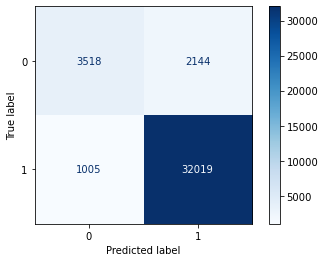

In [75]:
evaluate_model(lr, X_train,y_train)

accuracy: 0.9206989247311828
f1 0.9164796465653458
              precision    recall  f1-score   support

           0       0.78      0.61      0.69      1370
           1       0.94      0.97      0.95      8302

    accuracy                           0.92      9672
   macro avg       0.86      0.79      0.82      9672
weighted avg       0.92      0.92      0.92      9672



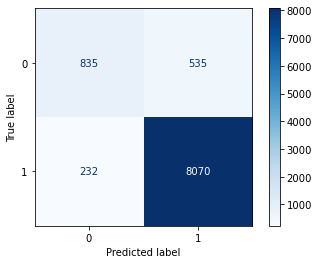

In [76]:
evaluate_model(lr, X_test,y_test)

accuracy: 0.9744093470506127
f1 0.9733795170670937
              precision    recall  f1-score   support

           0       1.00      0.83      0.90      5662
           1       0.97      1.00      0.99     33024

    accuracy                           0.97     38686
   macro avg       0.99      0.91      0.94     38686
weighted avg       0.98      0.97      0.97     38686



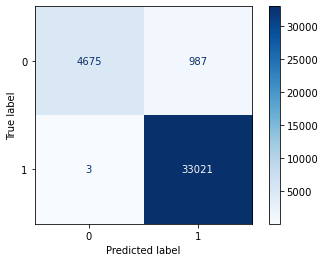

In [77]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_train,y_train)

accuracy: 0.9736352357320099
f1 0.9725324573526009
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1370
           1       0.97      1.00      0.98      8302

    accuracy                           0.97      9672
   macro avg       0.98      0.91      0.94      9672
weighted avg       0.97      0.97      0.97      9672



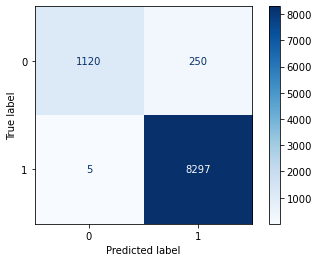

In [78]:
evaluate_model(dt, X_test,y_test)

## Ignore this Section, polarity does not make sense

In [79]:
train2, test2 = train_test_split(text_df, test_size = 0.2, random_state=42)
X_train2 = train2.drop(columns=['polarity'])
X_test2 = test2.drop(columns = ['polarity'])
y_test2= test2.polarity.values
y_train2 = train2.polarity.values

In [80]:
lr = LogisticRegression(C = 10)
lr.fit(X_train2, y_train2)
pred = lr.predict(X_test2)
pred, y_test2

C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 array([ 0,  0,  1, ...,  0,  0, -1], dtype=int64))

In [81]:
print('Testing accuracy for polarity: {:.2f}%'.format(lr.score(X_test2, y_test2)*100))

Testing accuracy for polarity: 93.37%
